# Introduction

For this project, there will be evaluation of house prices given the following feature:
- Year of Sale of the house
- The age of the house at the time of sale
- Distance from the city centre
- Number of stores in the facility
- Latitude
- Longitude


In [30]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as ply
from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print("Modules are imported")

Modules are imported


In [2]:
"""tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=None, on_epoch_end=None, on_batch_begin=None, on_batch_end=None,
    on_train_begin=None, on_train_end=None, **kwargs
)
"""

'tf.keras.callbacks.LambdaCallback(\n    on_epoch_begin=None, on_epoch_end=None, on_batch_begin=None, on_batch_end=None,\n    on_train_begin=None, on_train_end=None, **kwargs\n)\n'

### Importing the data

In [3]:
house_data = pd.read_csv("house_data.csv", names = column_names)
house_data.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [4]:
house_data.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

## Data Normalization

In [5]:
house_data = house_data.drop("serial", axis = 1)
house_data
#house_data = house_data.iloc[:,1:]

,date,age,distance,stores,latitude,longitude,price
0,2009,21,9,6,84,121,14264
1,2007,4,2,3,86,121,12032
2,2016,18,3,7,90,120,13560
3,2002,13,2,2,80,128,12029
4,2014,25,5,8,81,122,14157
...,...,...,...,...,...,...,...
4995,2007,17,6,3,90,125,13539
4996,2016,7,10,0,85,129,14757
4997,2017,6,10,5,90,125,14102
4998,2010,37,3,5,81,128,14313


In [6]:
def z_score(df):
    return (df - df.mean())/df.std()
house_data_norm = z_score(house_data)
house_data_norm

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266
...,...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831,-0.360156
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460,0.833055
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831,0.191385
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803,0.398091


In [84]:
def house_data_from_z(z_score, df):
    return (z_score * df.std()) + df.mean()
house_data_from_z(z_score(house_data["price"]), house_data["price"])

0       14264.0
1       12032.0
2       13560.0
3       12029.0
4       14157.0
         ...   
4995    13539.0
4996    14757.0
4997    14102.0
4998    14313.0
4999    12770.0
Name: price, Length: 5000, dtype: float64

## Creation of Training and Test sets

In [74]:
featured_data = house_data_norm.drop("price", axis = 1)
featured_data

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141
...,...,...,...,...,...,...
4995,-0.350485,-0.171675,0.319454,-0.609312,1.590328,0.001831
4996,1.298598,-1.054324,1.569518,-1.563848,0.009045,1.264460
4997,1.481830,-1.142588,1.569518,0.027045,1.590328,0.001831
4998,0.199209,1.593622,-0.618094,0.027045,-1.255981,0.948803


In [9]:
labeled_data = house_data_norm["price"]
labeled_data

0       0.350088
1      -1.836486
2      -0.339584
3      -1.839425
4       0.245266
          ...   
4995   -0.360156
4996    0.833055
4997    0.191385
4998    0.398091
4999   -1.113506
Name: price, Length: 5000, dtype: float64

In [19]:
labeled_data_array = labeled_data.values
featured_data_array = featured_data.values


In [27]:
fea_train, fea_test, lab_train, lab_test = train_test_split(featured_data_array,
                                                            labeled_data_array,
                                                            test_size = 0.05,
                                                            random_state = 0) 
print(fea_train.shape)
print(fea_test.shape)
print(lab_test.shape)
print(lab_train.shape)

(4750, 6)
(250, 6)
(250,)
(4750,)


## Creation of a Model

In [39]:
def get_model():
    model = Sequential([Dense(10, input_shape = (6,), activation = 'relu'),
                        Dense(10,  activation = 'relu'),
                        Dense(5,  activation = 'relu'),
                        Dense(1)

    ])
    model.compile(loss = 'mse',
                  optimizer = 'adam')
    return model
get_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [42]:
es_cb = EarlyStopping(monitor = 'val_loss', patience = 5)
model = get_model()
preds_on_untrained = model.predict(fea_test)
history = model.fit(fea_train,
                    lab_train, validation_data = (fea_test, lab_test),
                    epochs = 100, 
                    callbacks = [es_cb])

Train on 4750 samples, validate on 250 samples
Epoch 1/100
4750/4750 [==============================] - 1s 205us/sample - loss: 0.7223 - val_loss: 0.4355
Epoch 2/100
4750/4750 [==============================] - 0s 44us/sample - loss: 0.3895 - val_loss: 0.2183
Epoch 3/100
4750/4750 [==============================] - ETA: 0s - loss: 0.198 - 0s 43us/sample - loss: 0.1987 - val_loss: 0.1830
Epoch 4/100
4750/4750 [==============================] - 0s 44us/sample - loss: 0.1769 - val_loss: 0.1672
Epoch 5/100
4750/4750 [==============================] - 0s 44us/sample - loss: 0.1694 - val_loss: 0.1647
Epoch 6/100
4750/4750 [==============================] - 0s 54us/sample - loss: 0.1646 - val_loss: 0.1634
Epoch 7/100
4750/4750 [==============================] - 0s 45us/sample - loss: 0.1617 - val_loss: 0.1608
Epoch 8/100
4750/4750 [==============================] - 0s 44us/sample - loss: 0.1598 - val_loss: 0.1570
Epoch 9/100
4750/4750 [==============================] - 0s 43us/sample - loss: 

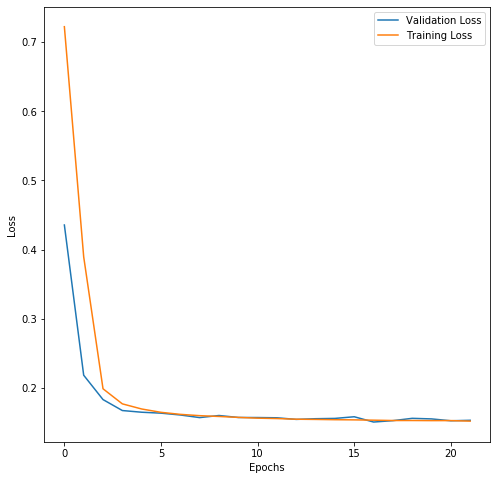

In [45]:
#To plot the training and validation loss
plot_loss(history)

## Plotting of the model

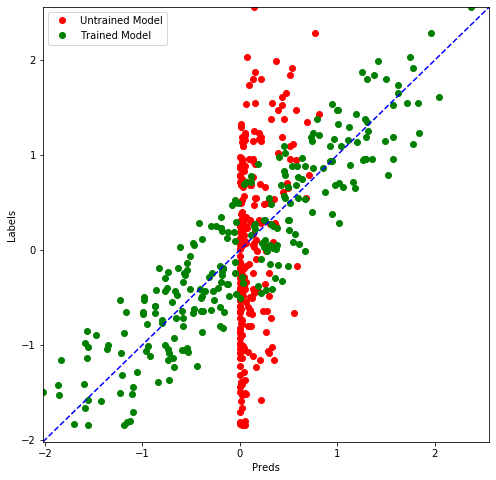

In [80]:
preds_on_trained = model.predict(fea_test)
compare_predictions(preds_on_untrained, preds_on_trained, lab_test)